In [46]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

In [3]:
df = pd.read_pickle("saved_df.pkl")

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


<AxesSubplot:>

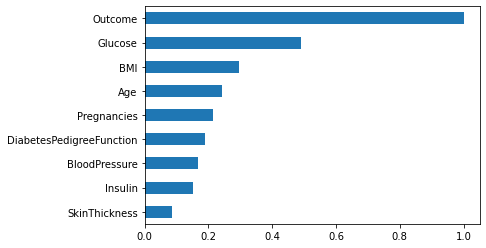

In [5]:
df.corr()["Outcome"].sort_values().plot.barh()

In [6]:
X = df.drop(["Outcome"], axis=1)
y = df["Outcome"]

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [11]:
log_model = LogisticRegression(max_iter=400)

In [12]:
log_model.fit(X_train, y_train)

LogisticRegression(max_iter=400)

In [13]:
y_pred = log_model.predict(X_test)

In [14]:
confusion_matrix(y_test, y_pred)

array([[83, 11],
       [21, 27]])

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.88      0.84        94
           1       0.71      0.56      0.63        48

    accuracy                           0.77       142
   macro avg       0.75      0.72      0.73       142
weighted avg       0.77      0.77      0.77       142



In [18]:
# Decision Tree

In [19]:
dt_model = DecisionTreeClassifier().fit(X_train, y_train)

In [20]:
y_pred = dt_model.predict(X_test)

In [21]:
confusion_matrix(y_test, y_pred)

array([[76, 18],
       [23, 25]])

In [22]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.58      0.52      0.55        48

    accuracy                           0.71       142
   macro avg       0.67      0.66      0.67       142
weighted avg       0.70      0.71      0.71       142



In [23]:
# As we can see from the results above, logistic regression performed better than the decision tree model.

In [24]:
# Let's try random forest now.

In [25]:
rf_model = RandomForestClassifier().fit(X_train, y_train)

In [26]:
y_pred = rf_model.predict(X_test)

In [27]:
confusion_matrix(y_test, y_pred)

array([[83, 11],
       [23, 25]])

In [28]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83        94
           1       0.69      0.52      0.60        48

    accuracy                           0.76       142
   macro avg       0.74      0.70      0.71       142
weighted avg       0.75      0.76      0.75       142



In [29]:
# Our logistic model still performed better than the random forest model.

In [30]:
# Let's tune our hyperparameters of our random forest model with GridSearch.

In [31]:
rf = RandomForestClassifier()

In [36]:
rf_params = {"n_estimators": [50, 100, 300, 400, 500],
            "max_depth": [1, 3, 5, 7, 9],
            "max_features": [2, 4, 6, 8],
            "min_samples_split": [1, 2, 3, 4],
            }

In [37]:
rf_cv_model = GridSearchCV(rf, rf_params, cv=5, n_jobs=-1, verbose=2).fit(X_train, y_train)
# n_jobs argument here says use all of the computer resources for this job.

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 186 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 389 tasks      | elapsed:   28.1s
[Parallel(n_jobs=-1)]: Done 672 tasks      | elapsed:   50.9s
[Parallel(n_jobs=-1)]: Done 1037 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 1482 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  3.0min finished


In [38]:
rf_cv_model.best_params_

{'max_depth': 5, 'max_features': 2, 'min_samples_split': 3, 'n_estimators': 50}

In [39]:
rf_tuned = RandomForestClassifier(max_depth=5,
                                 max_features=2,
                                 min_samples_split=3,
                                 n_estimators=50).fit(X_train, y_train)

In [40]:
y_pred = rf_tuned.predict(X_test)

In [41]:
confusion_matrix(y_test, y_pred)

array([[86,  8],
       [23, 25]])

In [42]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.91      0.85        94
           1       0.76      0.52      0.62        48

    accuracy                           0.78       142
   macro avg       0.77      0.72      0.73       142
weighted avg       0.78      0.78      0.77       142



In [43]:
# Now let's see what random forest says about feature importance.

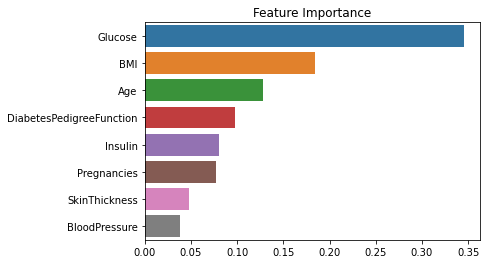

In [44]:
feature_imp = pd.Series(rf_tuned.feature_importances_,
                       index=X_train.columns).sort_values(ascending=False)
sns.barplot(x=feature_imp, y=feature_imp.index)
plt.title("Feature Importance")
plt.show()

In [47]:
# Let's try XGBoost now.

In [48]:
xgb_model = XGBClassifier().fit(X_train, y_train)

[03:43:56] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


In [49]:
y_pred = xgb_model.predict(X_test)

In [50]:
confusion_matrix(y_test, y_pred)

array([[76, 18],
       [23, 25]])

In [51]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.81      0.79        94
           1       0.58      0.52      0.55        48

    accuracy                           0.71       142
   macro avg       0.67      0.66      0.67       142
weighted avg       0.70      0.71      0.71       142



In [54]:
# It performed worse than logistic regression with the default values. Let's tune it now.

In [58]:
xgb = XGBClassifier()

In [59]:
xgb_params = {
    "n_estimators": [50, 100, 200, 300, 400, 500],
    "subsample": [0.5, 0.7, 0.9, 1.1, 1.3, 1.5],
    "max_depth": [1, 3, 5, 7, 9],
    "learning_rate": [0.1, 0.01, 0.2, 0.3, 0.4]
}

In [60]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=5,
                           n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 5 folds for each of 900 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   14.0s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   47.3s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 997 tasks      | elapsed:  3.3min
[Parallel(n_jobs=-1)]: Done 1442 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 1969 tasks      | elapsed:  7.3min
[Parallel(n_jobs=-1)]: Done 2576 tasks      | elapsed:  9.3min
[Parallel(n_jobs=-1)]: Done 3265 tasks      | elapsed: 11.3min
[Parallel(n_jobs=-1)]: Done 4034 tasks      | elapsed: 13.5min
[Parallel(n_jobs=-1)]: Done 4500 out of 4500 | elapsed: 15.2min finished
/home/hawking/miniconda3/envs/regression/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning,

[04:08:35] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [61]:
xgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 300, 'subsample': 0.7}

In [62]:
xgb_tuned = XGBClassifier(learning_rate=0.01,
                         max_depth=1,
                         n_estimators=300,
                         subsample=0.7).fit(X_train, y_train)

[04:11:02] WARNING: /home/conda/feedstock_root/build_artifacts/xgboost_1607604574104/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [63]:
y_pred = xgb_tuned.predict(X_test)

In [64]:
confusion_matrix(y_test, y_pred)

array([[86,  8],
       [25, 23]])

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.91      0.84        94
           1       0.74      0.48      0.58        48

    accuracy                           0.77       142
   macro avg       0.76      0.70      0.71       142
weighted avg       0.76      0.77      0.75       142



In [66]:
# a sign of overfitting?